# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [193]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [202]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

Citylist = pd.read_json("./city.list.json")
Citylist.set_index(Citylist['name'],inplace=True)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #should be 1500
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500) #should be 1500
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    #print(city)
    
    # If the city is new, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    if len(cities) % 100 ==0:
        print(f"{len(cities)} cities listed.")
print(len(cities))

100 cities listed.
200 cities listed.
200 cities listed.
300 cities listed.
300 cities listed.
300 cities listed.
300 cities listed.
300 cities listed.
400 cities listed.
500 cities listed.
600 cities listed.
600 cities listed.
600 cities listed.
600 cities listed.
600 cities listed.
600 cities listed.
600 cities listed.
600 cities listed.
600 cities listed.
600 cities listed.
600 cities listed.
600 cities listed.
613


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [208]:
#initialize variables
Citydict= pd.DataFrame([['Placeholder', 0,0,0,'NaN',0,0,0]],columns =['City Name','Lat','Lon','Cloudiness','Country','Humidity','Temp Max','Wind Speed'])
Today = pd.datetime.today().strftime("%m/%d/%y")


base_url = "https://api.openweathermap.org/data/2.5/weather?"
#testcity = "Buffalo"

i=0

while len(Citydict)-1<500:
    query_url = base_url + "appid=" + api_key + "&units=imperial" + "&q=" + cities[i]    #"&lon=" + str(Lng) + "&lat="+ str(Lat)
    #print(query_url)
    time.sleep(1.1)
    print(f"Processing Record {i} : {cities[i]}")
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
    except:
        print("API call failed")
    if weather_json['cod']=='404':
        print(f"{cities[i]} Not Found")
    else:
        #pprint(weather_json)
        City_weather = {'City Name': weather_json['name'], 'Lat': weather_json['coord']['lat'], 'Lon' : weather_json['coord']['lon'], 'Cloudiness' : weather_json['clouds']['all'], 'Country':weather_json['sys']['country'], 'Humidity':weather_json['main']['humidity'], 'Temp Max' :weather_json['main']['temp_max'], 'Wind Speed':weather_json['wind']['speed']}
        #print(City_weather)
        Citydict = Citydict.append(City_weather, ignore_index=True)
        #print(Citydict)
    i+=1

Citydict.set_index('City Name', inplace=True)
try:
    Citydict = Citydict.drop(['Placeholder'],axis=0)
except:
    print("No placeholder")
Citydict.head()

Processing Record 0 : hithadhoo
Processing Record 1 : iqaluit
Processing Record 2 : ushuaia
Processing Record 3 : vacaria
Processing Record 4 : saint-francois
Processing Record 5 : bluff
Processing Record 6 : cherskiy
Processing Record 7 : geraldton
Processing Record 8 : cabo san lucas
Processing Record 9 : roebourne
Processing Record 10 : samusu
samusu Not Found
Processing Record 11 : taolanaro
taolanaro Not Found
Processing Record 12 : atuona
Processing Record 13 : sentyabrskiy
sentyabrskiy Not Found
Processing Record 14 : busselton
Processing Record 15 : hasaki
Processing Record 16 : vaini
Processing Record 17 : kodiak
Processing Record 18 : yurginskoye
Processing Record 19 : cape town
Processing Record 20 : tigil
Processing Record 21 : rikitea
Processing Record 22 : qaanaaq
Processing Record 23 : bredasdorp
Processing Record 24 : amposta
Processing Record 25 : matamoros
Processing Record 26 : mehamn
Processing Record 27 : albany
Processing Record 28 : yeppoon
Processing Record 29 :

Processing Record 235 : tual
Processing Record 236 : ngunguru
Processing Record 237 : yumen
Processing Record 238 : gormi
gormi Not Found
Processing Record 239 : luderitz
Processing Record 240 : sao filipe
Processing Record 241 : lufkin
Processing Record 242 : tacuarembo
Processing Record 243 : laguna
Processing Record 244 : biak
Processing Record 245 : itupiranga
Processing Record 246 : lata
Processing Record 247 : amderma
amderma Not Found
Processing Record 248 : koygorodok
Processing Record 249 : kabo
Processing Record 250 : bogorodskoye
Processing Record 251 : barrow
Processing Record 252 : primo tapia
Processing Record 253 : talara
Processing Record 254 : corsicana
Processing Record 255 : abu kamal
Processing Record 256 : tawnat
tawnat Not Found
Processing Record 257 : ghanzi
Processing Record 258 : edson
Processing Record 259 : villafranca di verona
Processing Record 260 : severo-kurilsk
Processing Record 261 : gravdal
Processing Record 262 : pacific grove
Processing Record 263 :

Processing Record 469 : maumere
Processing Record 470 : raychikhinsk
Processing Record 471 : omagari
Processing Record 472 : pangnirtung
Processing Record 473 : kavieng
Processing Record 474 : marzuq
Processing Record 475 : nisia floresta
Processing Record 476 : nome
Processing Record 477 : terre-de-bas
Processing Record 478 : belen
Processing Record 479 : waspan
waspan Not Found
Processing Record 480 : guararapes
Processing Record 481 : tawzar
tawzar Not Found
Processing Record 482 : ixtapa
Processing Record 483 : bandarbeyla
Processing Record 484 : namie
Processing Record 485 : capreol
Processing Record 486 : la ronge
Processing Record 487 : vernon
Processing Record 488 : sistranda
Processing Record 489 : port hardy
Processing Record 490 : ambon
Processing Record 491 : khash
Processing Record 492 : grahamstown
Processing Record 493 : kendari
Processing Record 494 : jaciara
Processing Record 495 : fengzhen
Processing Record 496 : torbay
Processing Record 497 : san felipe
Processing Re

,Lat,Lon,Cloudiness,Country,Humidity,Temp Max,Wind Speed
City Name,,,,,,,
Hithadhoo,-0.60,73.08,64,MV,100,81.96,3.53
Iqaluit,63.75,-68.52,75,CA,72,15.80,10.29
Ushuaia,-54.81,-68.31,75,AR,50,53.60,23.04
Vacaria,-28.51,-50.94,76,BR,100,63.78,3.27
Saint-Francois,46.42,3.91,20,FR,93,37.40,3.98


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [209]:
Citydict.to_csv("./CityWeatherData.csv")
Citydict.head()

,Lat,Lon,Cloudiness,Country,Humidity,Temp Max,Wind Speed
City Name,,,,,,,
Hithadhoo,-0.60,73.08,64,MV,100,81.96,3.53
Iqaluit,63.75,-68.52,75,CA,72,15.80,10.29
Ushuaia,-54.81,-68.31,75,AR,50,53.60,23.04
Vacaria,-28.51,-50.94,76,BR,100,63.78,3.27
Saint-Francois,46.42,3.91,20,FR,93,37.40,3.98


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

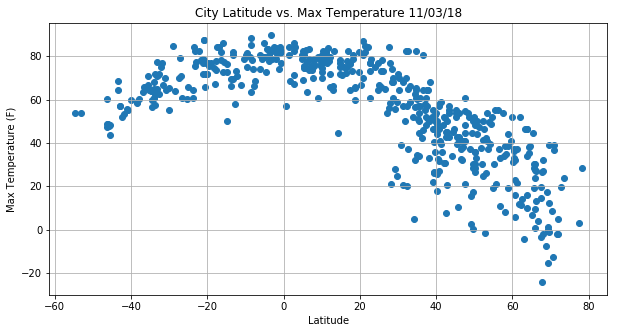

In [210]:

plt.scatter(Citydict.loc[:,['Lat']],Citydict.loc[:,['Temp Max']])
plt.title(f"City Latitude vs. Max Temperature {Today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=None, which='major', axis="both")
plt.rcParams['figure.figsize']=[10,5]


plt.savefig("./CityLatVsMT.png")

#### Latitude vs. Humidity Plot

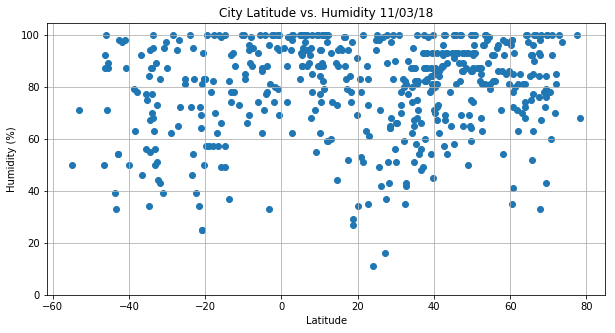

In [211]:
plt.scatter(Citydict.loc[:,['Lat']],Citydict.loc[:,['Humidity']])
plt.title(f"City Latitude vs. Humidity {Today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None, which='major', axis="both")
plt.rcParams['figure.figsize']=[10,5]
plt.ylim(0,None)

plt.savefig("./CityLatVsHU.png")

#### Latitude vs. Cloudiness Plot

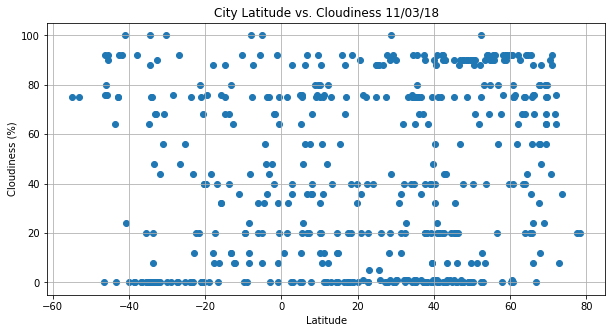

In [212]:
plt.scatter(Citydict.loc[:,['Lat']],Citydict.loc[:,['Cloudiness']])
plt.title(f"City Latitude vs. Cloudiness {Today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None, which='major', axis="both")
plt.rcParams['figure.figsize']=[10,5]
plt.ylim(-5,None)

plt.savefig("./CityLatVsCL.png")

#### Latitude vs. Wind Speed Plot

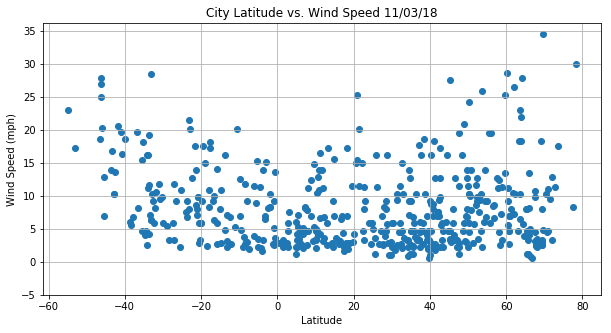

In [213]:
plt.scatter(Citydict.loc[:,['Lat']],Citydict.loc[:,['Wind Speed']], vmin =0)
plt.title(f"City Latitude vs. Wind Speed {Today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None, which='major', axis="both")
plt.rcParams['figure.figsize']=[10,5]
plt.ylim(-5,None)
plt.savefig("./CityLatVsWS.png")